In [1]:
## Importing the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


C:\Users\Sreejit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Dataset -1 (Received Payment Data)

In [2]:
# Reading the dataset.
payments_data = pd.read_csv("Received_Payments_Data.csv")
payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
# Checking Shape of the dataset.

payments_data.shape

(93937, 16)

In [4]:
# Checking with describe() method.

payments_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [5]:
# Checking info.

payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [6]:
# Checking for null values.

payments_data.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [7]:
# The RECEIPT_DOC_NO column has some null values, dropping that entire column since it will be of no use to us for modelling.

del payments_data['RECEIPT_DOC_NO']

In [8]:
# Checking if the column is deleted or not.
payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [9]:
# Converting the date columns to pandas datetime format.

payments_data['INVOICE_CREATION_DATE'] = pd.to_datetime(payments_data['INVOICE_CREATION_DATE'])
payments_data['RECEIPT_DATE'] = pd.to_datetime(payments_data['RECEIPT_DATE'])
payments_data['DUE_DATE'] = pd.to_datetime(payments_data['DUE_DATE'])

In [10]:
# Checking the datatypes again.

payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

In [11]:
# Seems like all the date columns have been converted to datetime format successfuly.

In [12]:
# Dropping CUSTOMER_NUMBER column as it will not be useful for the model.

del payments_data['CUSTOMER_NUMBER']

In [13]:
payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [14]:
# Creating the target varibale 'DEFAULT' in boolean.

payments_data['DEFAULT'] = (payments_data["RECEIPT_DATE"] > payments_data["DUE_DATE"])

In [15]:
# Converting the DEFAULT column from boolean to integer.
payments_data['DEFAULT'] = payments_data['DEFAULT'].astype(int)

In [16]:
# Checking the head of the dataset.

payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,DEFAULT
0,WIRE,C EA Corp,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [17]:
# Checking the count of the defaulters.

payments_data.DEFAULT.value_counts()

DEFAULT
1    61978
0    31959
Name: count, dtype: int64

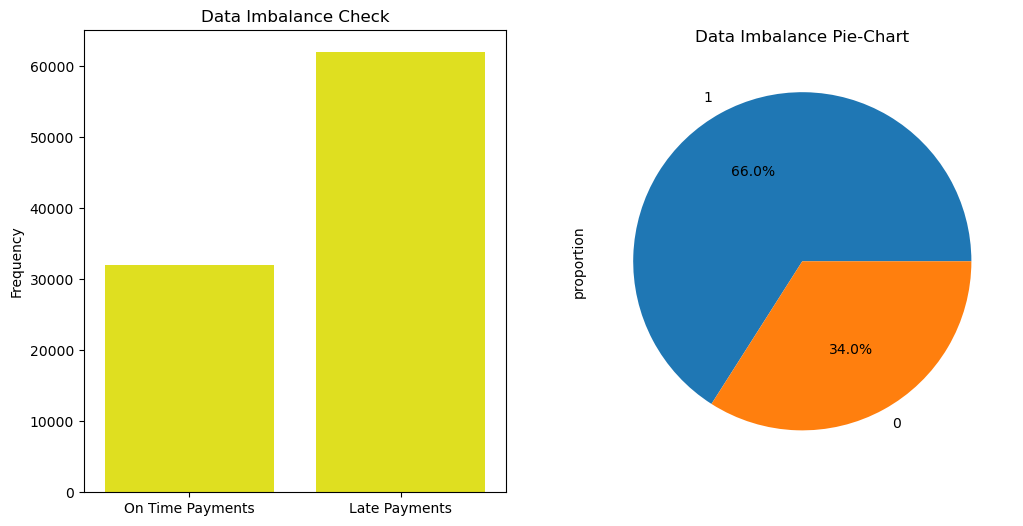

In [18]:
# Seems like not much data imbalance is present in the target variable. 

# ploting the default column
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x='DEFAULT', data=payments_data, color = 'yellow')

plt.title("Data Imbalance Check")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1), ('On Time Payments', 'Late Payments'))

plt.subplot(1,2,2)
#data imbalance chart
(payments_data.DEFAULT.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Pie-Chart")

plt.show()

In [19]:
# Dropping 'Local Amount' column as we will be using the converted 'USD Amount' column

del payments_data['Local Amount']

In [20]:
# Dropping 'CLASS' column as it has only one value and is not useful.

del payments_data['CLASS']

In [21]:
payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,DEFAULT
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


# Exploratory Data Analysis 

## Univariate Analysis

In [22]:
# Categorical Columns
cat_cols= ['RECEIPT_METHOD','CUSTOMER_NAME','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE','INVOICE_TYPE']

# Numerical Columns
num_cols= ['USD Amount']

In [23]:
# Numerical Columns.

payments_data['USD Amount'].describe().round()

count       93937.0
mean       531201.0
std        950869.0
min             0.0
25%         37663.0
50%        181001.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

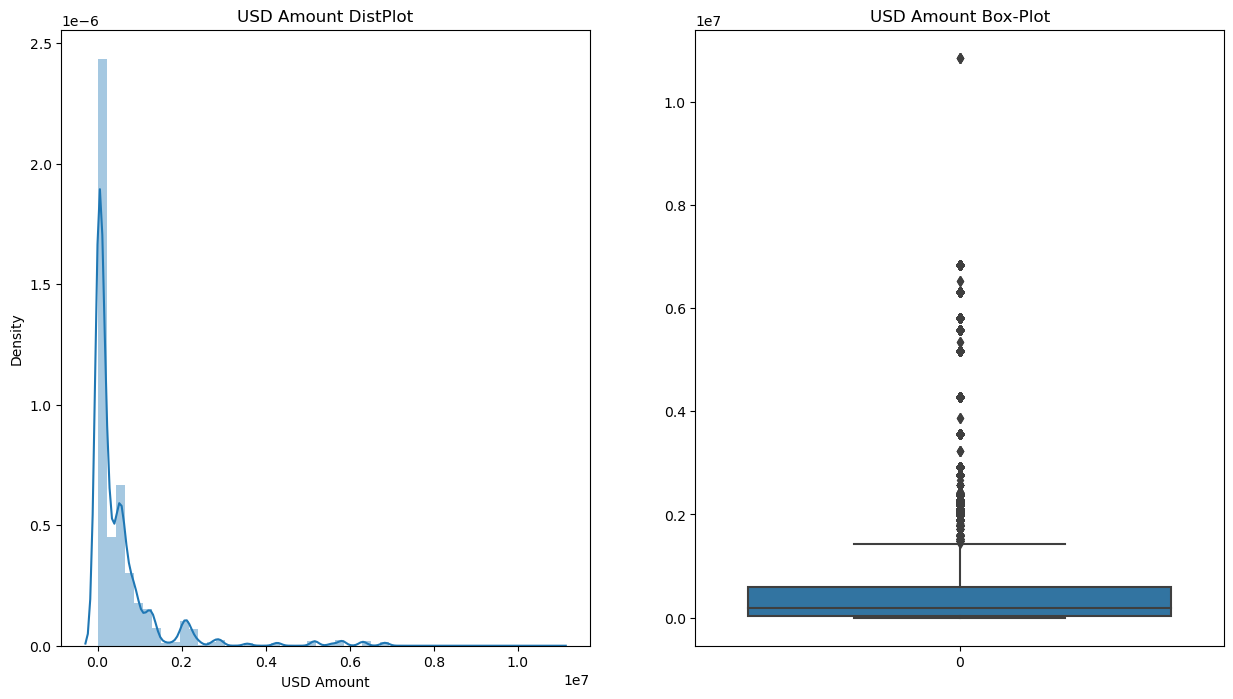

In [24]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(payments_data['USD Amount'])
plt.title("USD Amount DistPlot")

plt.subplot(1,2,2)
sns.boxplot(payments_data['USD Amount'])
plt.title("USD Amount Box-Plot")

plt.show()

In [25]:
# Categorical Columns

In [26]:
# Checking value counts for 'RECEIPT_METHOD'.

payments_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             84407
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

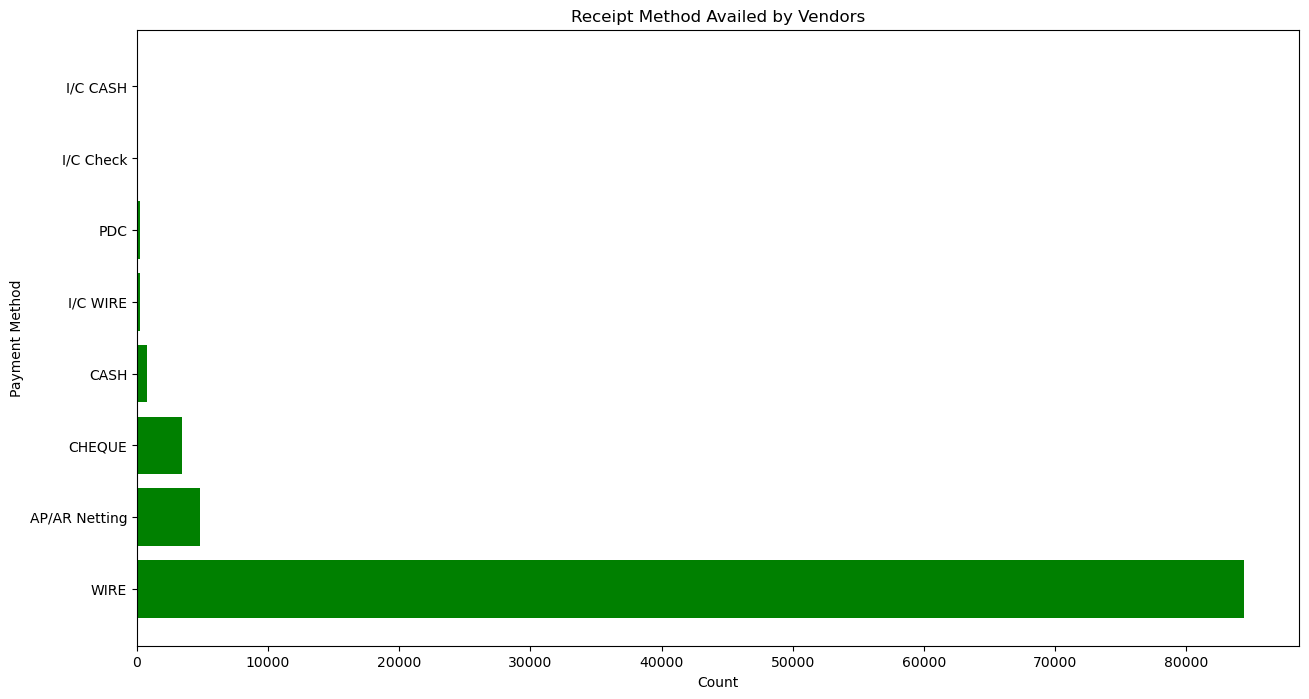

In [27]:
# Plotting the column.

plt.figure(figsize=(15,8))

receipt_counts = payments_data['RECEIPT_METHOD'].value_counts() 
plt.barh(receipt_counts.index, receipt_counts.values,color = 'green' ) 
plt.xlabel('Count') 
plt.ylabel('Payment Method') 
plt.title('Receipt Method Availed by Vendors') 

plt.show()

In [28]:
# Most commonly used method for payment by vendors is 'WIRE'.

In [29]:
# Checking for top 15 Customers based on invoice amount in USD.

payments_data['USD Amount'] = payments_data['USD Amount'].astype(float) 

# Group by 'CUSTOMER_NAME' and sum 'USD Amount'

payments_data.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending=False).head(15)


CUSTOMER_NAME
SEPH Corp    3.253371e+10
FARO Corp    5.790071e+09
PARF Corp    3.200510e+09
ALLI Corp    2.580741e+09
AREE Corp    1.125144e+09
HABC Corp    5.343216e+08
RADW Corp    3.622376e+08
L OR Corp    2.955509e+08
CGR  Corp    2.795162e+08
PCD  Corp    2.466070e+08
AL T Corp    2.418545e+08
DEBE Corp    1.600318e+08
DUBA Corp    1.530501e+08
CLAD Corp    1.337310e+08
ARAB Corp    1.202341e+08
Name: USD Amount, dtype: float64

In [30]:
# SEPH Corp, FARO Corp and PARF Corp are the top 3 Customers for organisation. 

In [31]:
# Currency code value counts.

payments_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
SAR    36495
AED    36279
USD    19524
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

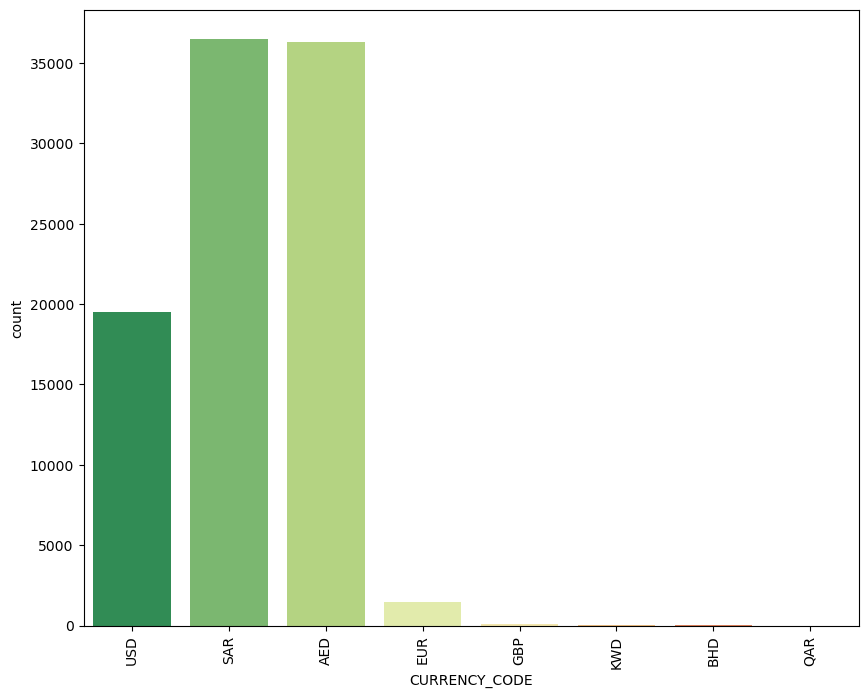

In [32]:
# Plotting the column.

plt.figure(figsize=(10,8))
ax = sns.countplot(data=payments_data, x='CURRENCY_CODE', palette='RdYlGn_r')
plt.xticks(rotation= 90)

plt.show()

In [33]:
# SAR,AED and USD are the top 3 currencies in which payments have been made. 

In [34]:
# Checking the top 15 PAYMENT_TERMs accepted by clients.
payments_data['PAYMENT_TERM'].value_counts().head(15)

PAYMENT_TERM
60 Days from Inv Date    19870
30 Days from Inv Date    14672
60 Days from EOM         12518
30 Days from EOM         11306
15 Days from EOM          7544
Immediate Payment         5474
Immediate                 5261
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
90 Days from Inv Date     2211
100% Adv Payment          1241
25 DAYS FROM EOM           462
Cash on Delivery           418
15 Days from Inv Date      356
Name: count, dtype: int64

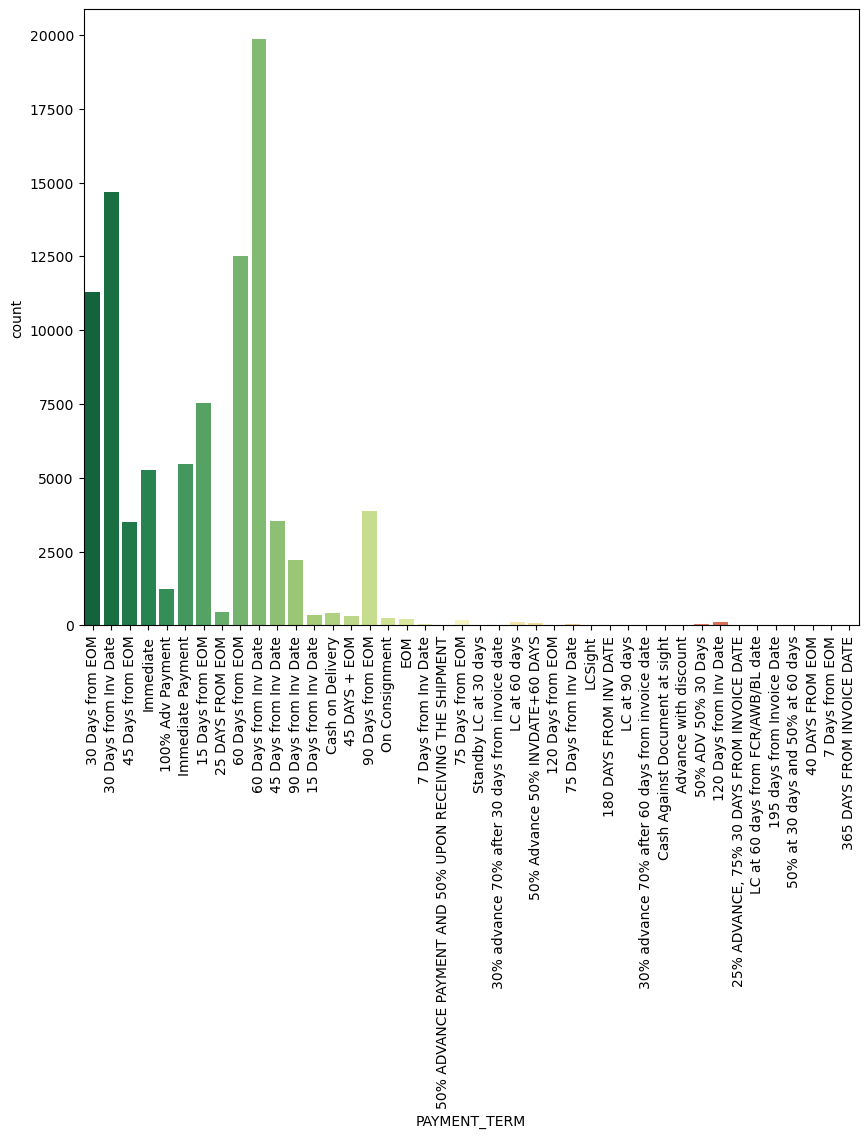

In [35]:
# Plotting the column.

plt.figure(figsize=(10,8))
ax = sns.countplot(data=payments_data, x='PAYMENT_TERM', palette='RdYlGn_r')
plt.xticks(rotation= 90)

plt.show()

In [36]:
# Checking the value counts of INVOICE_CLASS
payments_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    88124
CM      5261
DM       552
Name: count, dtype: int64

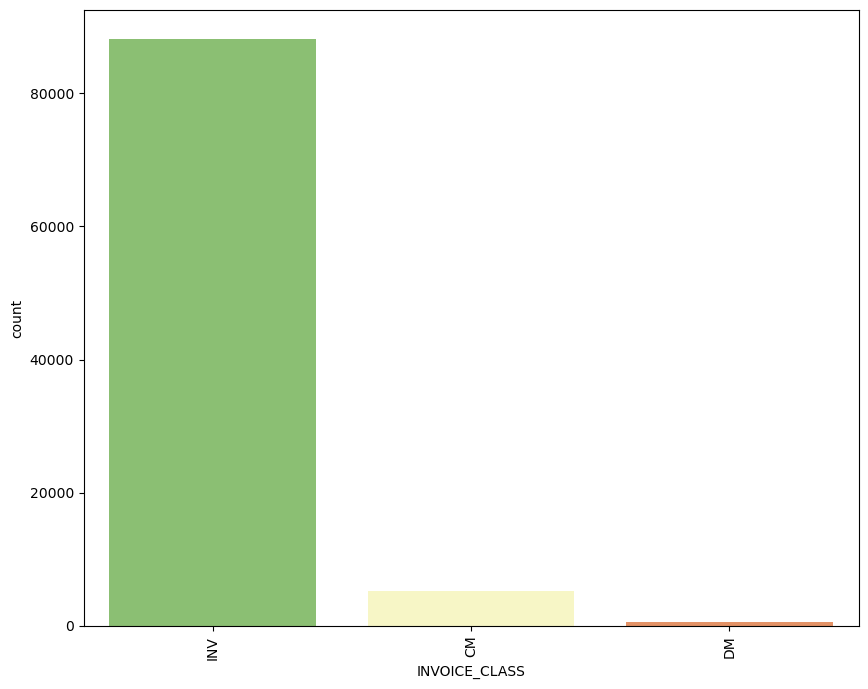

In [37]:
# Plotting the column.

plt.figure(figsize=(10,8))
ax = sns.countplot(data=payments_data, x='INVOICE_CLASS', palette='RdYlGn_r')
plt.xticks(rotation= 90)

plt.show()

In [38]:
# INV clearly has the max value. 

In [39]:
# Checking the value counts of INVOICE_CLASS
payments_data['INVOICE_CURRENCY_CODE'].value_counts()

INVOICE_CURRENCY_CODE
SAR    39199
AED    32377
USD    18547
EUR     1519
KWD     1089
QAR      611
BHD      400
GBP      134
JOD       38
ZAR       23
Name: count, dtype: int64

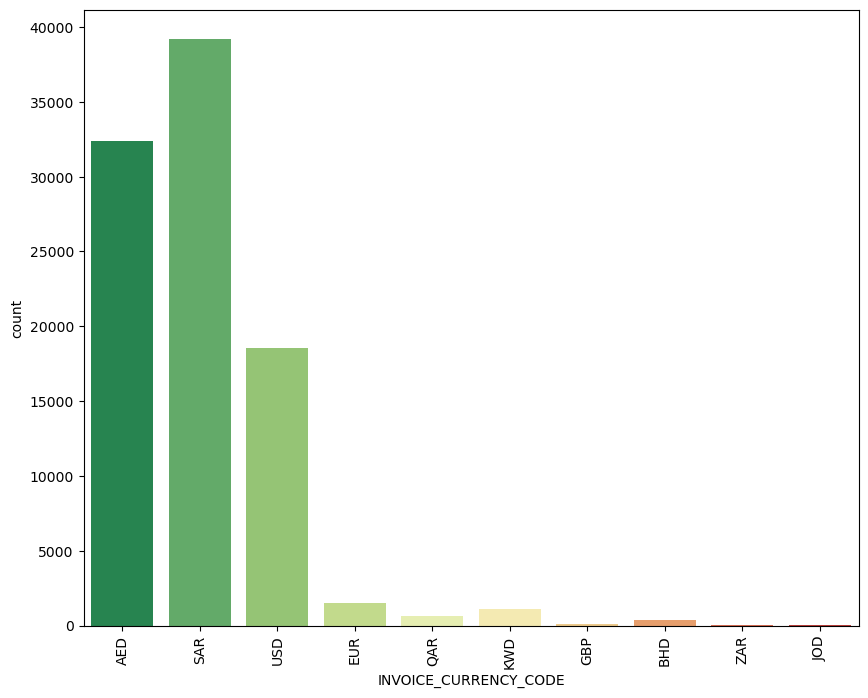

In [40]:
# Plotting the column.

plt.figure(figsize=(10,8))
ax = sns.countplot(data=payments_data, x='INVOICE_CURRENCY_CODE', palette='RdYlGn_r')
plt.xticks(rotation= 90)

plt.show()

In [41]:
# The maximum number of invoices were generated in SAR, AED and USD currency.

In [42]:
# Checking the value counts of INVOICE_TYPE
payments_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66715
Non Goods    27222
Name: count, dtype: int64

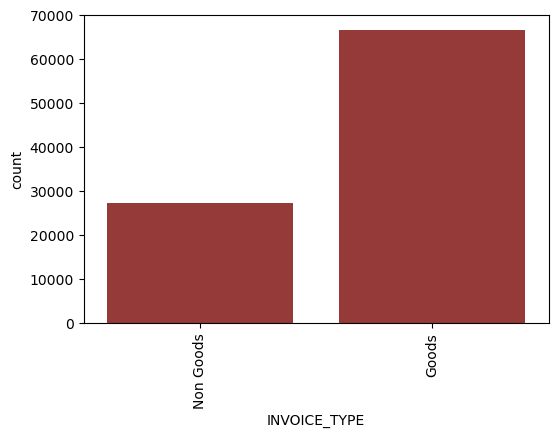

In [43]:
# Plotting the column.

plt.figure(figsize=(6,4))
ax = sns.countplot(data=payments_data, x='INVOICE_TYPE', color='brown')
plt.xticks(rotation= 90)

plt.show()

## Bivariate Analysis

In [44]:
# Extracting month from the date columns

payments_data['month_reciept'] = payments_data['RECEIPT_DATE'].dt.month
payments_data['month_inv_creation'] = payments_data['INVOICE_CREATION_DATE'].dt.month
payments_data['month_due'] = payments_data['DUE_DATE'].dt.month

In [45]:
# Month-wise invoices due

orders_due_month = payments_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13392
2     13007
3     14711
4     14131
5     13373
6     10505
7      1595
8      1114
9       982
10     1748
11     2947
12     6432
Name: DUE_DATE, dtype: int64

In [46]:
late_dues = payments_data.groupby('month_due').agg({'DEFAULT': 'mean'}) 
late_dues = late_dues.sort_index(ascending=True) 
print(late_dues)

            DEFAULT
month_due          
1          0.718190
2          0.687553
3          0.622867
4          0.621895
5          0.559859
6          0.417135
7          0.389342
8          0.800718
9          0.976578
10         0.999428
11         1.000000
12         0.999845


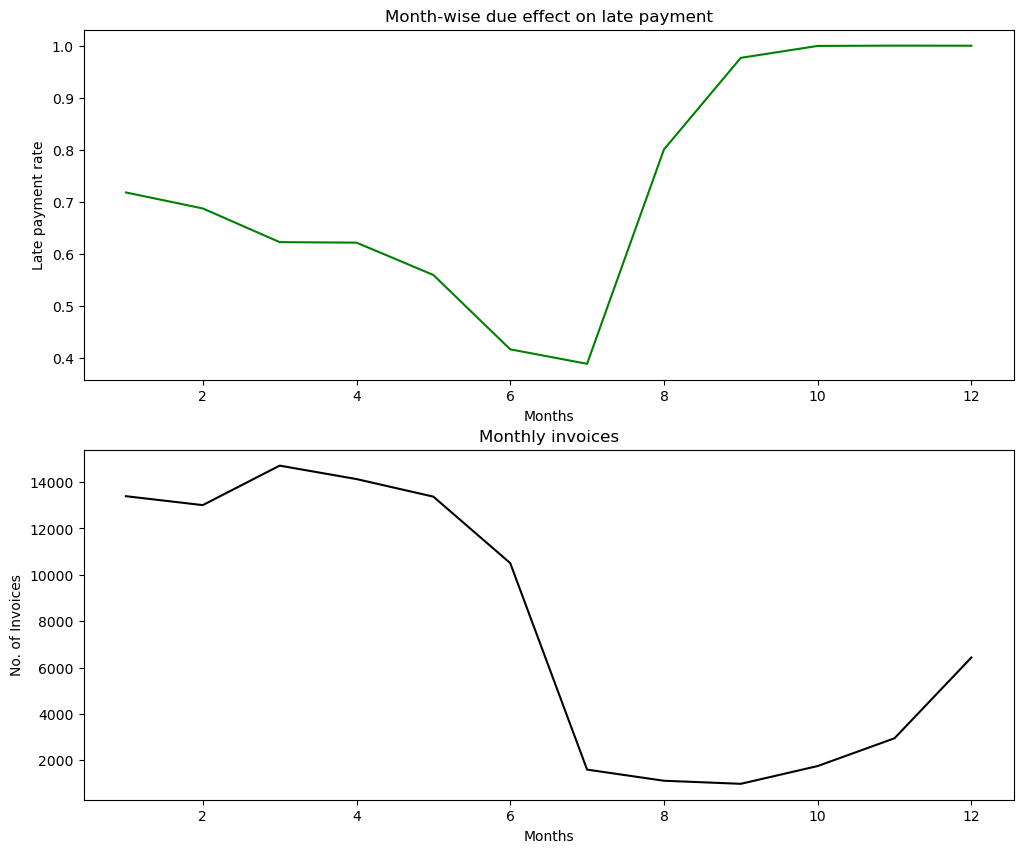

In [47]:
# Visualising the effect of month on late payment rate

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(late_dues, color='green')
plt.title("Month-wise due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_due_month, color='black')
plt.title("Monthly invoices")
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

. Month 7 has the lowest late payments and the least number of invoices.
. Late payment rate reduces from month 1 till month 7 and then drastically increases till month 9 and then flattens at the peak.
. For month 3 number of invoices is the highest but late payment rate is considerably on the lower side.
. Second half of the year has low number of invoices but higher ratio of late payments and first half of the year has higher      number of invoices but lower late payment ratio. 

In [48]:
# USD Amount column

In [49]:
usd_amt_late = payments_data.pivot_table(values='USD Amount', index='DEFAULT', aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_late

,DEFAULT,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,573789.580869,222908.31,878567.107996
1,1,509240.683742,153246.45,985370.354404


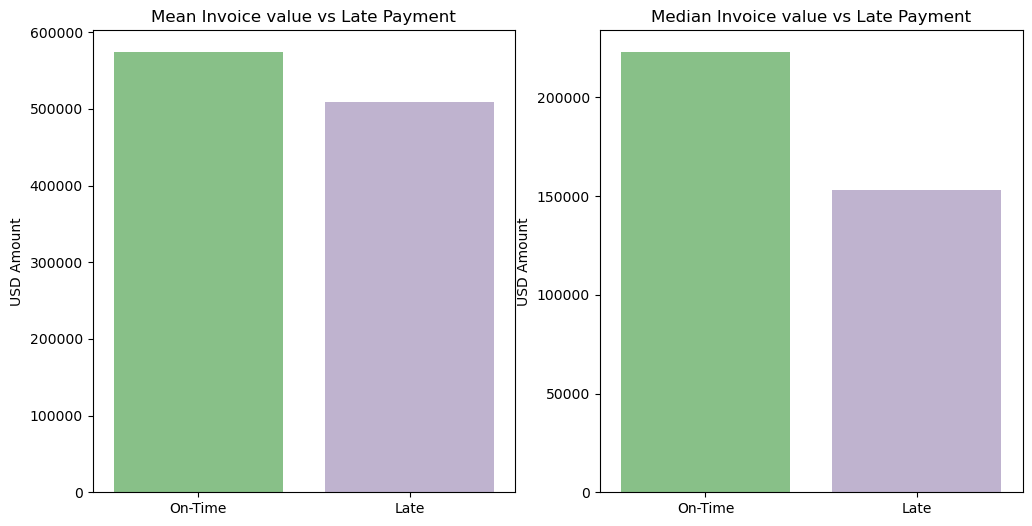

In [50]:
# Visualising mean and median of the invoice value with respect to late payment

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

sns.barplot(data=usd_amt_late, x='DEFAULT', y=('mean','USD Amount'), palette='Accent')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1,2,2)

sns.barplot(data=usd_amt_late, x='DEFAULT', y=('median','USD Amount'), palette='Accent')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()

In [51]:
# This is a very interesting finding. The mean and median invoice value for on time payments is more that that of late payments.

In [52]:
# INVOICE_CLASS COLUMN

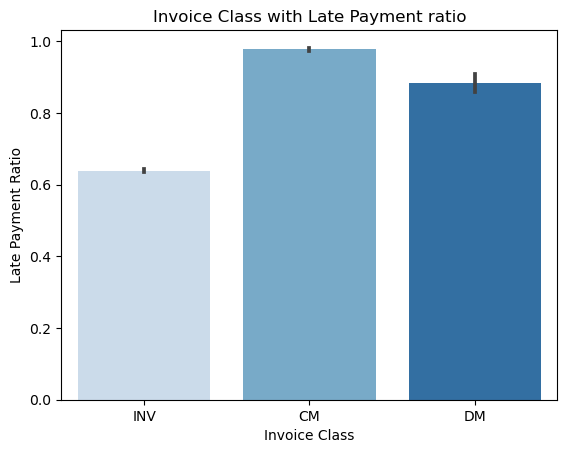

In [53]:
# Visualising the late payment ratio of each invoice class

sns.barplot(data=payments_data, x='INVOICE_CLASS', y='DEFAULT', estimator=np.mean, palette='Blues')
plt.title("Invoice Class with Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

In [54]:
# Late payment rate is the lowest for INV and highest for CM invoice classes. 

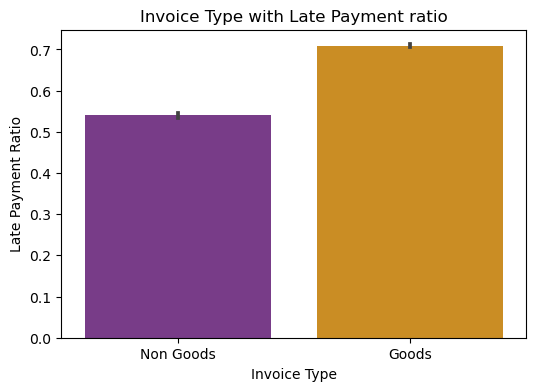

In [55]:
# Visualising the late payment ratio of each Invoice Type
plt.figure(figsize=(6,4))

sns.barplot(data=payments_data, x='INVOICE_TYPE', y='DEFAULT', estimator=np.mean, palette='CMRmap')
plt.title("Invoice Type with Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment Ratio")
plt.show()

In [56]:
# Goods has a higher late payment ratio than Non goods.

In [57]:
payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,DEFAULT,month_reciept,month_inv_creation,month_due
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,4,11,12
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,1,1,3
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1


# Feature Engineering

In [58]:
# Adjusting the payment terms column.

# Using cumsum() function to get cummulative sum on value_counts()

pay_term_cumsum = payments_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.211525
30 Days from Inv Date                                      0.367715
60 Days from EOM                                           0.500974
30 Days from EOM                                           0.621331
15 Days from EOM                                           0.701640
Immediate Payment                                          0.759914
Immediate                                                  0.815919
90 Days from EOM                                           0.857362
45 Days from Inv Date                                      0.895153
45 Days from EOM                                           0.932508
90 Days from Inv Date                                      0.956045
100% Adv Payment                                           0.969256
25 DAYS FROM EOM                                           0.974174
Cash on Delivery                                           0.978624
15 Days from Inv Date              

In [59]:
# Immediate and Immediate payment are same, replacing with Immediate Payment

payments_data['PAYMENT_TERM'] = payments_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, using 45 Days from EOM
payments_data['PAYMENT_TERM'] = payments_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = payments_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.211525
30 Days from Inv Date                                      0.367715
60 Days from EOM                                           0.500974
30 Days from EOM                                           0.621331
Immediate Payment                                          0.735610
15 Days from EOM                                           0.815919
90 Days from EOM                                           0.857362
45 Days from EOM                                           0.898145
45 Days from Inv Date                                      0.935936
90 Days from Inv Date                                      0.959473
100% Adv Payment                                           0.972684
25 DAYS FROM EOM                                           0.977602
Cash on Delivery                                           0.982052
15 Days from Inv Date                                      0.985842
On Consignment                     

In [60]:
# We can clearly see that the top 10 entries consititute 95% of the entries, clubbing the rest together into 'others'.

# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
payments_data['PAYMENT_TERM'] = payments_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

payments_data['PAYMENT_TERM'].value_counts()

PAYMENT_TERM
60 Days from Inv Date    19870
30 Days from Inv Date    14672
60 Days from EOM         12518
30 Days from EOM         11306
Immediate Payment        10735
15 Days from EOM          7544
90 Days from EOM          3893
45 Days from EOM          3831
others                    3807
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

In [61]:
# One-Hot Encoding 'PAYMENT_TERM' Column.

payment_term_dummies= pd.get_dummies(payments_data['PAYMENT_TERM'], dtype = int).drop('others', axis=1)

payments_data = payments_data.join(payment_term_dummies).drop('PAYMENT_TERM', axis=1 )
payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CLASS,INVOICE_CURRENCY_CODE,...,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,INV,AED,...,0,1,0,0,0,0,0,0,0,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,INV,SAR,...,0,0,1,0,0,0,0,0,0,0
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,INV,SAR,...,0,0,1,0,0,0,0,0,0,0
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,INV,SAR,...,0,0,1,0,0,0,0,0,0,0
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,INV,SAR,...,0,0,1,0,0,0,0,0,0,0


In [62]:
# One-Hot Encoding 'INVOICE_CLASS' column.

invoice_class_dummies= pd.get_dummies(payments_data['INVOICE_CLASS'], drop_first = True, dtype = int)
payments_data = payments_data.join(invoice_class_dummies).drop('INVOICE_CLASS', axis=1 )
payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,INVOICE_TYPE,...,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,Non Goods,...,0,0,0,0,0,0,0,0,0,1
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,Non Goods,...,1,0,0,0,0,0,0,0,0,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,Non Goods,...,1,0,0,0,0,0,0,0,0,1
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,Non Goods,...,1,0,0,0,0,0,0,0,0,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,Non Goods,...,1,0,0,0,0,0,0,0,0,1


In [63]:
payments_data.shape

(93937, 26)

In [64]:
payments_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'DEFAULT', 'month_reciept',
       'month_inv_creation', 'month_due', '15 Days from EOM',
       '30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       '45 Days from Inv Date', '60 Days from EOM', '60 Days from Inv Date',
       '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 'DM',
       'INV'],
      dtype='object')

# Dataset -2(Open Invoice Data)

In [65]:
# Reading the dataset
open_data = pd.read_csv("Open_Invoice_data.csv", encoding = 'latin1')
open_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [66]:
# Checking shape.

open_data.shape

(88204, 14)

In [67]:
# Checking info.

open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [68]:
# Dropping unnecesary columns.

open_data.drop(['AS_OF_DATE', 'Customer Type', 'Customer Account No', 'Transaction Number', 'Transaction Date', 'Transaction Currency', 'Local Amount'], axis = 1, inplace = True)

In [69]:
# Checking shape again.

open_data.shape

(88204, 7)

In [70]:
# Checking the head.

open_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [71]:
# Checking for null values.

open_data.isnull().sum()

Customer_Name        0
Payment Term         0
Due Date             0
Transaction Class    0
AGE                  0
USD Amount           0
INV_CREATION_DATE    0
dtype: int64

In [72]:
# We dont have any null values to deal with here. 

In [73]:
# Changing 'Due Date' and 'INV_CREATION_DATE' to pandas datetime format.

open_data['Due Date'] = pd.to_datetime(open_data['Due Date'])
open_data['INV_CREATION_DATE'] = pd.to_datetime(open_data['INV_CREATION_DATE'])

In [74]:
# Checking the values present in the USD Amount column.

open_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [75]:
# We can see ',' being present in the amounts.

open_data['USD Amount'] = open_data['USD Amount'].apply(lambda x: x.replace(",", ""))
open_data['USD Amount'] = open_data['USD Amount'].astype(int)

In [76]:
# Checking the column again.

open_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

In [77]:
# We can see the presence of negative numbers.

open_data = open_data[open_data['USD Amount']>0]

In [78]:
# Checking again.

open_data['USD Amount']

1         2000
2         2000
3         2415
4         3800
5         1264
         ...  
88197     1199
88198      914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 79516, dtype: int32

In [79]:
# Checking info to make sure all data types are correct now.
open_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


In [80]:
# All seems to be good to go now. 

## Feature Engineering Dataset -2

In [81]:
# Treating the payment term column same way as the first dataset.

open_data['Payment Term'] = open_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

open_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64

In [82]:
# Creating dummy variables for the column
term_dummies = pd.get_dummies(open_data['Payment Term'], dtype = int).drop('others', axis=1)

# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
open_data = open_data.join(term_dummies).drop('Payment Term', axis=1)
open_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


In [83]:
# Transaction class column.

# Checking the values in the column
open_data['Transaction Class'].value_counts()

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [84]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
open_data['Transaction Class'] = open_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [85]:
# Creating dummy variables for the column
tc = pd.get_dummies(open_data['Transaction Class'], dtype = int, drop_first = True)

# Adding the dummy variables to main dataset and dropping the Transaction Class column
open_data = open_data.join(tc).drop('Transaction Class', axis=1)

# Adding 'CM' level to the open_data dataset same as received payment data
open_data['CM'] = 0

In [86]:
# Checking the head of the data
open_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,1,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,1,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0


## Customer Segmentation

In [87]:
# Actual number of days taken to make the payment after invoice generation.
payments_data['days_payment'] = (payments_data['RECEIPT_DATE']-payments_data['INVOICE_CREATION_DATE']).dt.days

In [88]:
# Calculating customer wise average days for payment
cust_seg1= payments_data.groupby('CUSTOMER_NAME')['days_payment'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'days_payment': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [89]:
# Calculating the standard deviation for customer wise payment
cust_seg2 = payments_data.groupby('CUSTOMER_NAME')['days_payment'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'days_payment': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [90]:
# concatanating the above two dataframes
cust_segment = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

# Checking the head
cust_segment.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


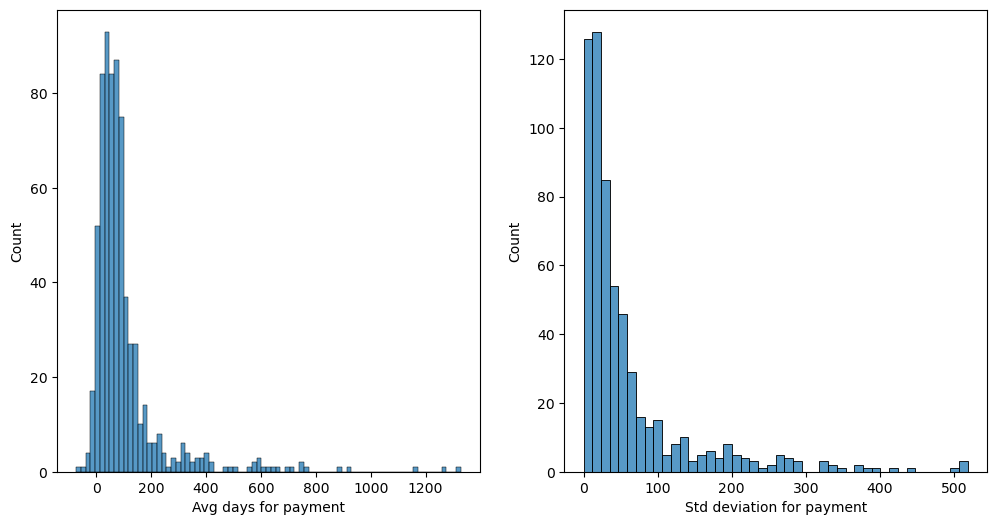

In [91]:
# Visualising the cust_segment dataframe
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(cust_segment['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_segment['Std deviation for payment'])

plt.show()

In [92]:
# Its clear that this data needs scaling.

In [93]:
# Importing the library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cust_segment[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_segment[['Avg days for payment', 'Std deviation for payment']])

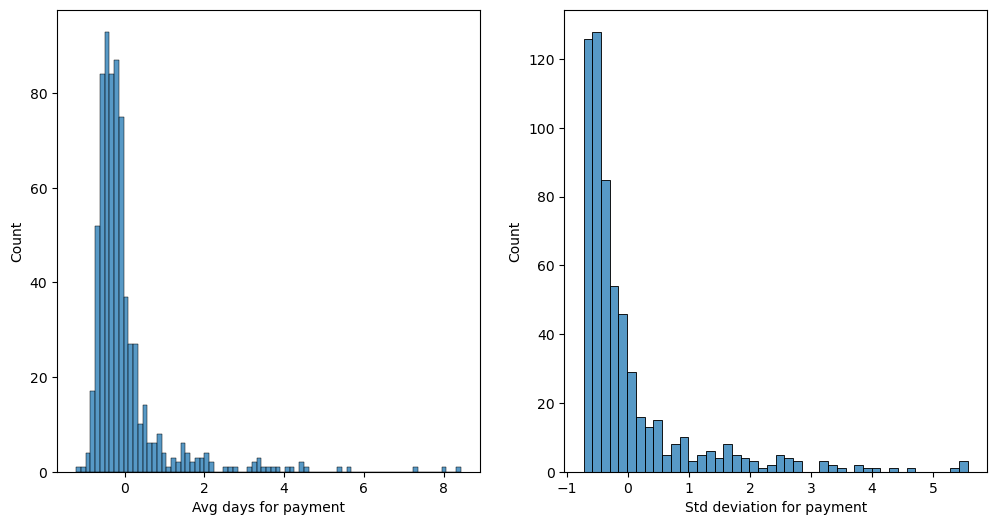

In [94]:
# Plotting the data again.

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(cust_segment['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_segment['Std deviation for payment'])

plt.show()

In [95]:
# resetting the index of the dataframe
cust_segment.reset_index(inplace=True)

# Checking for null values
round(cust_segment.isna().sum()/len(cust_segment.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1246
dtype: float64

In [96]:
# Imputing null values for Std deviation with 0
cust_segment['Std deviation for payment'].fillna(0,inplace=True)

In [97]:
# copying the cust_seg data for clustering into new dataframe
clustering_df = cust_segment.copy()
clustering_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.539379,-0.569399
1,6TH Corp,-0.427407,-0.631189
2,A3 D Corp,-0.394835,-0.089152
3,ABC Corp,-0.597152,-0.727783
4,ABDU Corp,-0.178023,-0.060756


In [98]:
#dropping the customer_name column for k-menas clustering.
clustering_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
clustering_df.head()

,Avg days for payment,Std deviation for payment
0,-0.539379,-0.569399
1,-0.427407,-0.631189
2,-0.394835,-0.089152
3,-0.597152,-0.727783
4,-0.178023,-0.060756


## K-Means Clustering

In [99]:
# Importing required libraries.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [100]:
# k-means clustering with some arbitrary k value.
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(clustering_df)
kmeans.cluster_centers_

array([[ 4.5685419 ,  0.49333719],
       [-0.2983909 , -0.33001236],
       [ 1.77276116,  3.46461734],
       [ 0.47153288,  1.0333609 ]])

In [101]:
# Finding the optimal number of clusters.

cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(clustering_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(clustering_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.751220065255244
For n_clusters=3, the silhouette score is 0.7360797287358812
For n_clusters=4, the silhouette score is 0.6188501658848016
For n_clusters=5, the silhouette score is 0.6215361042535064
For n_clusters=6, the silhouette score is 0.39993074170461446
For n_clusters=7, the silhouette score is 0.40137925811299136
For n_clusters=8, the silhouette score is 0.4154930270856101


In [102]:
# The results above show that n_clusters = 3 has a decent silhouette score, going ahead with 3 clusters. 

In [103]:
# Making the final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(clustering_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [104]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [105]:
# Assigning the labels to the cust_segment dataframe.
cust_segment['cluster_id'] = kmeans.labels_
cust_segment.head(50)

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.539379,-0.569399,0
1,6TH Corp,-0.427407,-0.631189,0
2,A3 D Corp,-0.394835,-0.089152,0
3,ABC Corp,-0.597152,-0.727783,0
4,ABDU Corp,-0.178023,-0.060756,0
5,ABED Corp,-0.607475,-0.667665,0
6,ABEE Corp,-0.693494,-0.667336,0
7,ABU Corp,0.162947,0.941511,0
8,ABWA Corp,-0.318449,-0.519991,0
9,ACTO Corp,-0.526043,-0.077985,0


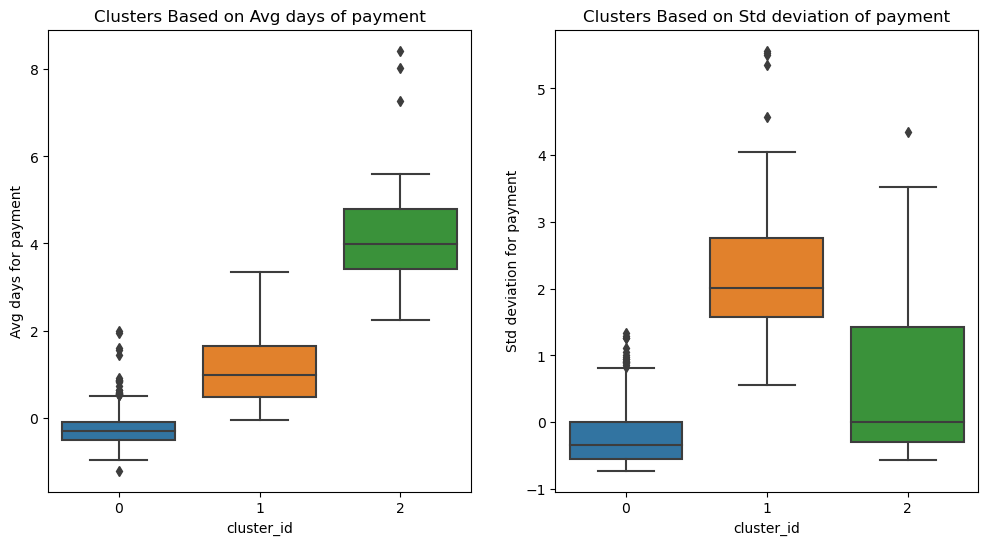

In [106]:
# Plotting box plot based on clusters
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_segment)
plt.title("Clusters Based on Avg days of payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_segment)
plt.title("Clusters Based on Std deviation of payment")
plt.show()

In [107]:
# 1. Cluster 0 shows early invoice payment.
# 2. Cluster 1 shows slightly delayed payments.
# 3. Cluster 2 shows the segment with most delayed payments. 

In [108]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign the cluster ids to each customer.

cust_segment.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [109]:
cust_segment1 = cust_segment.copy()

In [110]:
# Renaming the column
cust_segment1.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_segment1.head()

,Customer_Name,cluster_id
0,3D D Corp,0
1,6TH Corp,0
2,A3 D Corp,0
3,ABC Corp,0
4,ABDU Corp,0


In [111]:
# Setting the 'Customer_Name' as index
cust_segment1.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,0
6TH Corp,0
A3 D Corp,0
ABC Corp,0
ABDU Corp,0
...,...
YOUS Corp,0
ZAHR Corp,0
ZAIN Corp,0


Text(0.5, 1.0, 'Customer Segment Pie-Chart')

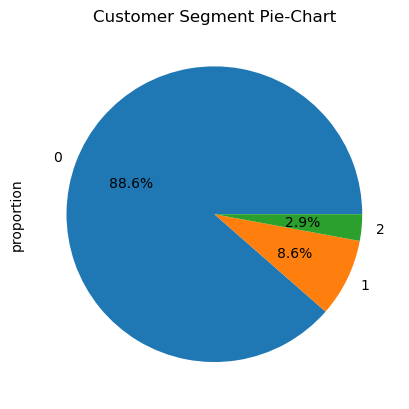

In [112]:
(cust_segment1.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Pie-Chart")

In [113]:
# From the above pie-chart its clear that early payments invoice payments make up the bulk(88.6%) of the payments. 

In [114]:
# Merging payments_data and cust_segment to add clustering index
merged_df = pd.merge(payments_data, cust_segment, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,INVOICE_TYPE,...,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,days_payment,cluster_id
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,Non Goods,...,0,0,0,0,0,0,0,1,169,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,Non Goods,...,0,0,0,0,0,0,0,1,33,0
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,Non Goods,...,0,0,0,0,0,0,0,1,1,0
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,Non Goods,...,0,0,0,0,0,0,0,1,47,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,Non Goods,...,0,0,0,0,0,0,0,1,47,0


In [115]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

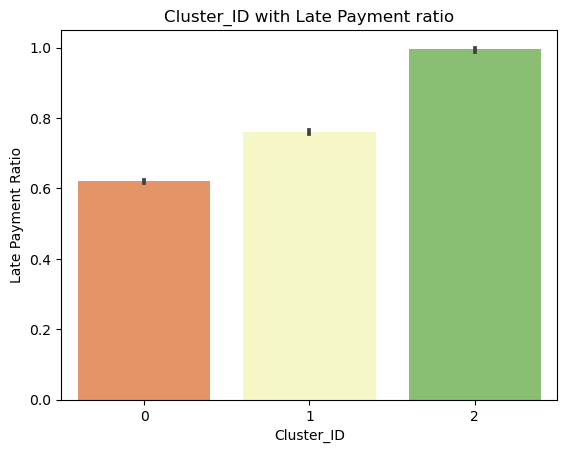

In [116]:


sns.barplot(data=merged_df, x='cluster_id', y='DEFAULT', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

## Data Preparation for Model Building

In [117]:
# Creating a new dataframe with all the important variables for the model building.

new_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV','cluster_id']]
new_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,101018.63040,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0
1,48990.21133,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0
2,41991.60971,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0
3,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,1
4,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0


In [118]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
new_df['Invoice_Month'] = new_df['INVOICE_CREATION_DATE'].dt.month
new_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
new_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,1,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,12


In [119]:
new_df.shape

(93937, 15)

In [120]:
# Open Invoice dataset
open_new_df = open_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 'INV', 'CM','AGE']]
open_new_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,1,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,1,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,-25


In [121]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_new_df['Invoice_Month'] = open_new_df['INV_CREATION_DATE'].dt.month
open_new_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_new_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,1,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,1,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,1,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,1,0,-25,3


In [122]:
# Creating Due_Month column and dropping Due Date
open_new_df['Due_Month'] = open_new_df['Due Date'].dt.month
open_new_df.drop('Due Date',axis=1,inplace= True)
open_new_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [123]:
# Everything seems to be in order now.

## Train-Test Split

In [124]:
X = new_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,1,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,12


In [125]:
y = merged_df['DEFAULT']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: DEFAULT, dtype: int32

In [126]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
5808,7.266122e+05,0,0,0,0,0,1,0,0,0,0,0,1,0,11
4822,1.502366e+03,0,0,0,0,0,0,0,0,0,0,0,1,0,6
20528,0.000000e+00,0,0,1,0,0,0,0,0,0,0,0,1,0,11
78318,5.028068e+05,0,0,0,0,0,0,0,0,0,1,0,0,1,10
23754,2.101629e+06,0,0,0,0,0,1,0,0,0,0,0,1,0,2


## Feature Scaling

In [127]:
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
5808,0.205662,0,0,0,0,0,1,0,0,0,0,0,1,0,11
4822,-0.558648,0,0,0,0,0,0,0,0,0,0,0,1,0,6
20528,-0.560232,0,0,1,0,0,0,0,0,0,0,0,1,0,11
78318,-0.030243,0,0,0,0,0,0,0,0,0,1,0,0,1,10
23754,1.655014,0,0,0,0,0,1,0,0,0,0,0,1,0,2


In [128]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
count,6.575500e+04,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000
mean,-1.446371e-16,0.079234,0.120249,0.155182,0.041381,0.038400,0.133222,0.211087,0.041655,0.023648,0.115094,0.005703,0.937754,0.280481,5.501057
std,1.000008e+00,0.270105,0.325255,0.362081,0.199171,0.192162,0.339817,0.408083,0.199800,0.151952,0.319138,0.075303,0.241604,0.454488,4.076926
min,-5.602321e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.205330e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,-3.663828e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
75%,7.179763e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
max,1.087615e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


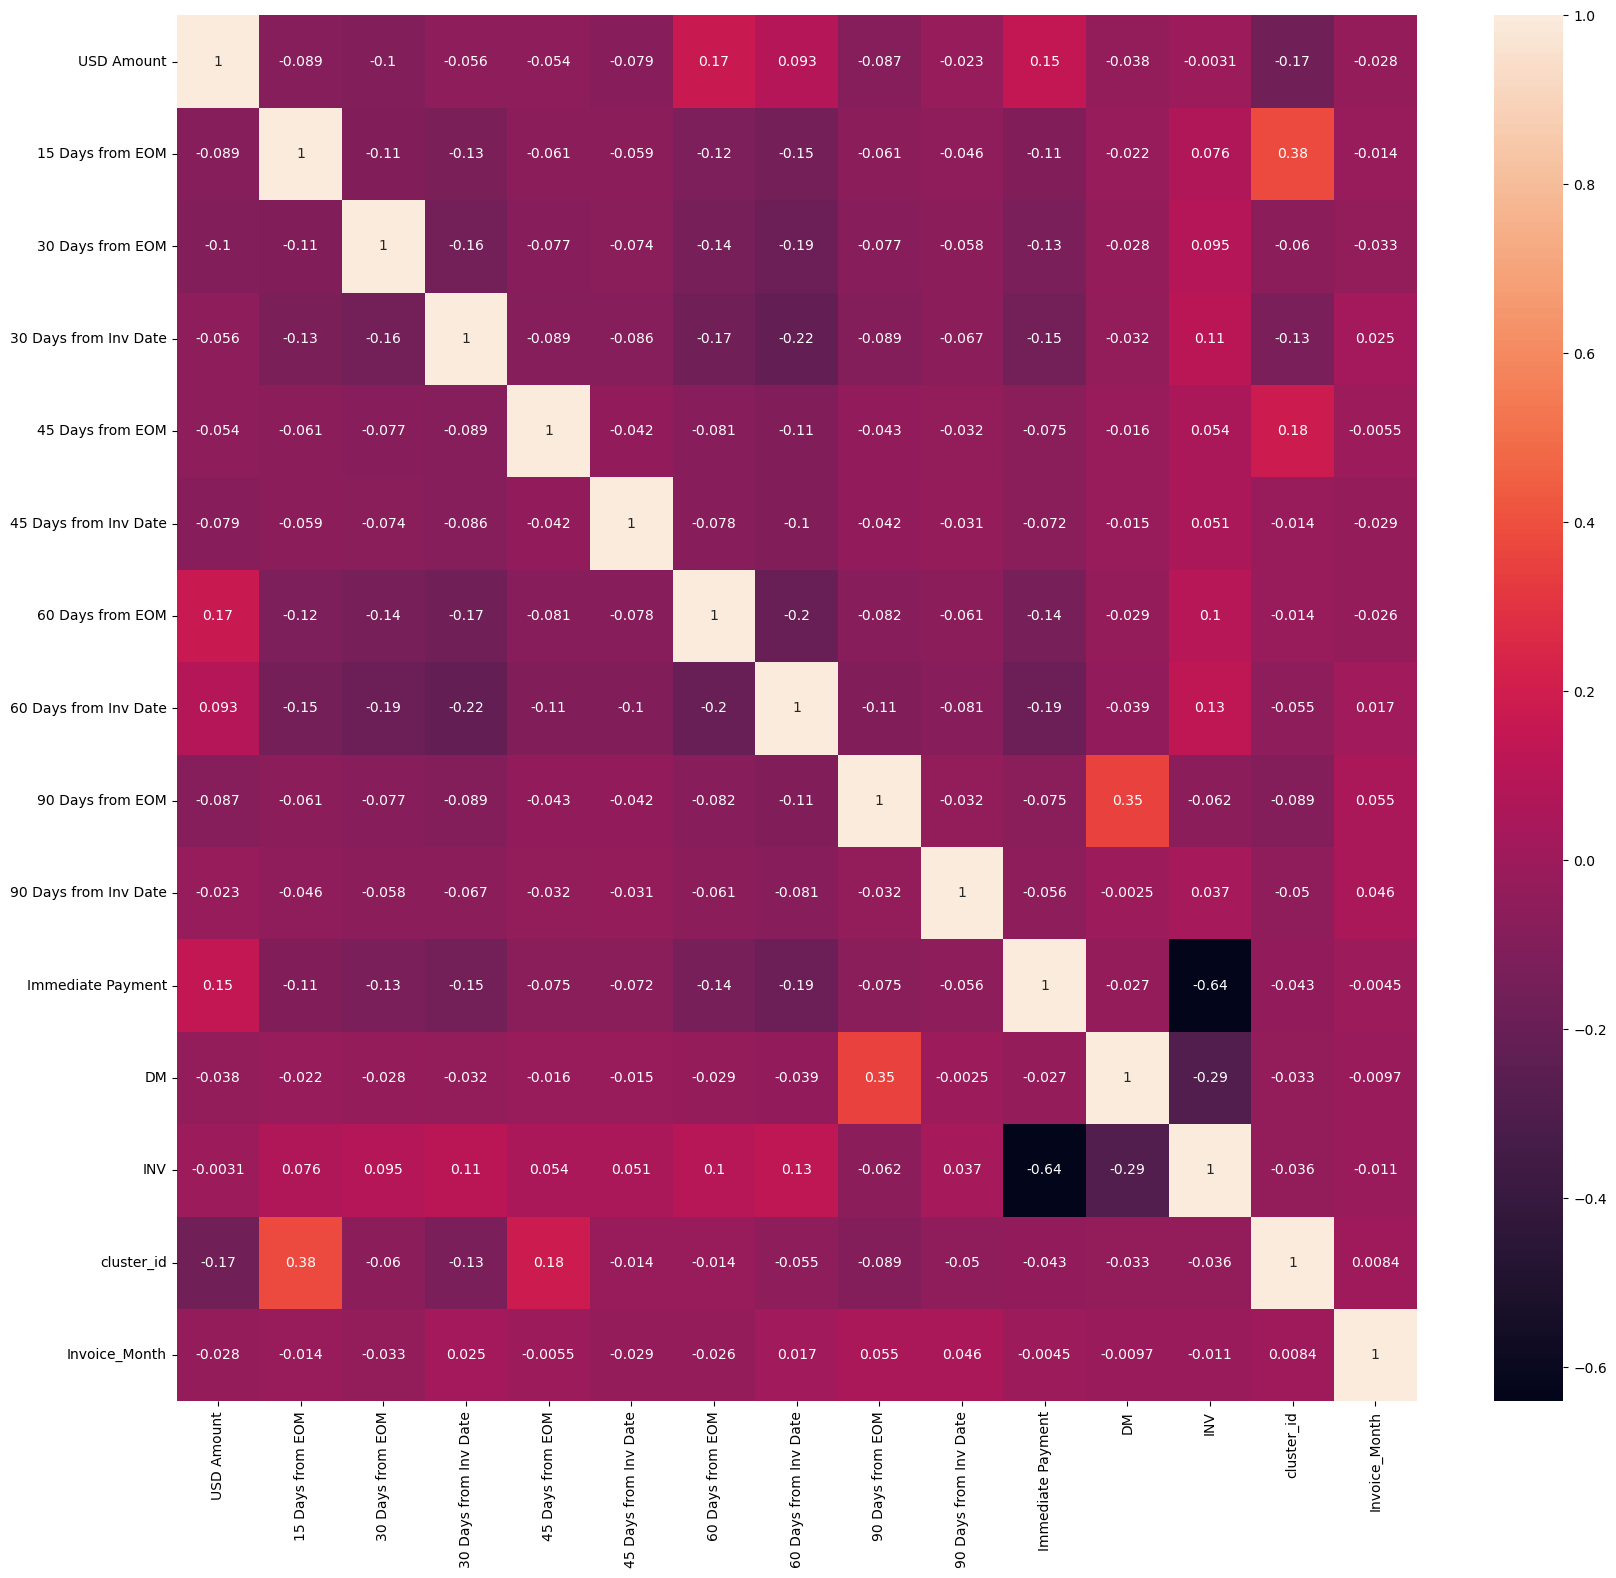

In [129]:
# Plotting heat map for X_train dataset
plt.figure(figsize=(20,18))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [130]:
# There is slight multicollinearity but we can handle that later during feature selection.

## Model Building 

### Logistic Regression

In [131]:
# Importing the required library.
import statsmodels.api as sm

In [132]:
# 1st Model

In [133]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65739
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30255.
Date:                Tue, 07 Jan 2025   Deviance:                       60510.
Time:                        18:25:35   Pearson chi2:                 6.38e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3046
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4750      0.195     -2.436      0.015      -0.857      -0.093
USD Amount               -0.0426      0.012     -3.563      0.000      -0.066      -0.019
15 Days from EOM          2.3727      0.102     23.323      0.000       2.173       2.572
30 Days from EOM         -2.2852      0.052    -43.580      0.000      -2.388      -2.182
30 Days from Inv Date     0.3333      0.051      6.483      0.000       0.233       0.434
45 Days from EOM          0.3371      0.069      4.870      0.000       0.201       0.473
45 Days from Inv Date    -0.2656      0.062     -4.258      0.000      -0.388      -0.143
60 Days from EOM         -2.1358      0.052    -40.890      0.000      -2.238      -2.033
60 Days from Inv Date    -0.1542      0.049     -3.129      0.002      -0.251      -0.058
90 Days from EOM         -0.6349      0.063    -10.148      0.000      -0.758      -0.512
90 Days from Inv Date    -0.9637      0.069    -13.943      0.000      -1.099      -0.828
Immediate Payment         3.6006      0.161     22.423      0.000       3.286       3.915
DM                        2.6979      0.254     10.630      0.000       2.200       3.195
INV                       0.9134      0.189      4.833      0.000       0.543       1.284
cluster_id                0.4719      0.026     18.457      0.000       0.422       0.522
Invoice_Month             0.0997      0.003     39.261      0.000       0.095       0.105
=========================================================================================
"""

In [134]:
# Checking VIF

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,INV,13.92
7,60 Days from Inv Date,4.19
3,30 Days from Inv Date,3.31
6,60 Days from EOM,3.04
2,30 Days from EOM,2.79
14,Invoice_Month,2.77
1,15 Days from EOM,2.49
8,90 Days from EOM,1.79
13,cluster_id,1.75
4,45 Days from EOM,1.71


In [136]:
# We can see here that the INV variable ha a high VIF which was seen in the heatmap as well. Removing that variable.

In [137]:
X_train.drop(['INV'], axis=1, inplace=True)
X_test.drop(['INV'], axis=1, inplace=True)

In [138]:
# 2nd Model

In [139]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65740
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30267.
Date:                Tue, 07 Jan 2025   Deviance:                       60535.
Time:                        18:25:35   Pearson chi2:                 6.38e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3043
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4400      0.047      9.421      0.000       0.348       0.532
USD Amount               -0.0403      0.012     -3.397      0.001      -0.064      -0.017
15 Days from EOM          2.3738      0.102     23.334      0.000       2.174       2.573
30 Days from EOM         -2.2854      0.052    -43.586      0.000      -2.388      -2.183
30 Days from Inv Date     0.3323      0.051      6.465      0.000       0.232       0.433
45 Days from EOM          0.3378      0.069      4.880      0.000       0.202       0.474
45 Days from Inv Date    -0.2657      0.062     -4.259      0.000      -0.388      -0.143
60 Days from EOM         -2.1371      0.052    -40.926      0.000      -2.239      -2.035
60 Days from Inv Date    -0.1556      0.049     -3.160      0.002      -0.252      -0.059
90 Days from EOM         -0.6352      0.063    -10.153      0.000      -0.758      -0.513
90 Days from Inv Date    -0.9645      0.069    -13.955      0.000      -1.100      -0.829
Immediate Payment         3.0907      0.101     30.745      0.000       2.894       3.288
DM                        1.7846      0.169     10.535      0.000       1.453       2.117
cluster_id                0.4693      0.026     18.346      0.000       0.419       0.519
Invoice_Month             0.0997      0.003     39.243      0.000       0.095       0.105
=========================================================================================
"""

In [140]:
# Checking VIF again.

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Invoice_Month,2.68
12,cluster_id,1.75
1,15 Days from EOM,1.46
7,60 Days from Inv Date,1.46
3,30 Days from Inv Date,1.30
6,60 Days from EOM,1.30
8,90 Days from EOM,1.26
10,Immediate Payment,1.26
2,30 Days from EOM,1.21
4,45 Days from EOM,1.17


In [142]:
# All values are perfect so going ahead with this model iteration. 

In [143]:
# Predicted values for the train set.
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5808     0.352335
4822     0.742824
20528    0.868924
78318    0.993295
23754    0.173005
66271    0.991413
43470    0.619402
5958     0.472505
92968    0.879734
60913    0.705817
dtype: float64

In [144]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35233518, 0.74282423, 0.86892417, 0.99329536, 0.17300473,
       0.99141314, 0.61940187, 0.47250542, 0.87973385, 0.70581742])

In [145]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'default':y_train.values, 'default_pred':y_train_pred})
y_pred.head()

,default,default_pred
0,0,0.352335
1,0,0.742824
2,1,0.868924
3,1,0.993295
4,0,0.173005


In [146]:
# Making the prediction based on 0.5 cutoff
y_pred['logreg_pred'] = y_pred['default_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()

,default,default_pred,logreg_pred
0,0,0.352335,0
1,0,0.742824,1
2,1,0.868924,1
3,1,0.993295,1
4,0,0.173005,0


In [147]:
# Importing the libraries for metrics and confusion matrix.

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [149]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.default, y_pred.logreg_pred)
confusion

array([[12903,  9524],
       [ 4670, 38658]], dtype=int64)

In [150]:
# Accuracy Score
print(accuracy_score(y_pred.default, y_pred.logreg_pred))

0.7841380883582998


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Let's check the sensitivity of the model.
sensitivity = TP / float(TP+FN)
sensitivity

0.8922175036927622

In [153]:
# Calculating specificity.
specificity = TN / float(TN+FP)
specificity

0.5753333036072591

In [154]:
# Calculating the false postive rate.
print(FP/ float(TN+FP))

0.4246666963927409


In [155]:
# Positive predictive value of the model.
print (TP / float(TP+FP))

0.8023328213855797


In [156]:
# Negative predictive value of the model.
print (TN / float(TN+ FN))

0.73425140841063


In [157]:
# These metrics have been obtained with a general cutoff of 0.5. Lets find the optimal cutoff for the model.

In [158]:

for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,0,0.352335,0,1,1,1,0,0,0,0,0,0
1,0,0.742824,1,1,1,1,1,1,1,1,0,0
2,1,0.868924,1,1,1,1,1,1,1,1,1,0
3,1,0.993295,1,1,1,1,1,1,1,1,1,1
4,0,0.173005,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65750,1,0.756082,1,1,1,1,1,1,1,1,0,0
65751,0,0.735094,1,1,1,1,1,1,1,1,0,0
65752,0,0.218717,0,1,1,0,0,0,0,0,0,0
65753,1,0.913778,1,1,1,1,1,1,1,1,1,1


In [159]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.658931  1.000000  0.000000
0.2   0.2  0.728188  0.970135  0.260757
0.3   0.3  0.770649  0.950125  0.423909
0.4   0.4  0.785233  0.913705  0.537031
0.5   0.5  0.784138  0.892218  0.575333
0.6   0.6  0.771865  0.849220  0.622419
0.7   0.7  0.732674  0.712726  0.771213
0.8   0.8  0.660847  0.523080  0.927008
0.9   0.9  0.542012  0.311669  0.987025


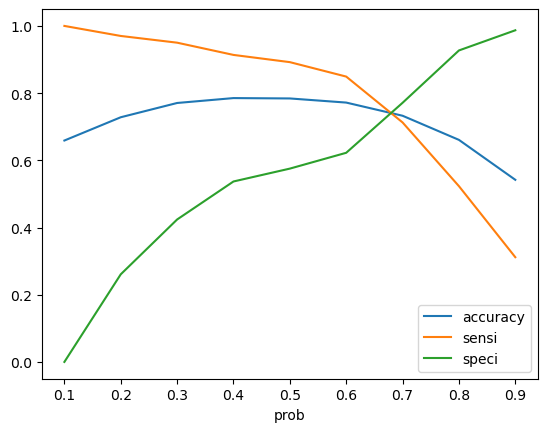

In [160]:
# Let's plot the accuracy sensitivity and specificity for the different probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [161]:
# 0.6 Seems to be the perfect cutoff point for this model.

In [162]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,0,0.352335,0,1,1,1,0,0,0,0,0,0,0
1,0,0.742824,1,1,1,1,1,1,1,1,0,0,1
2,1,0.868924,1,1,1,1,1,1,1,1,1,0,1
3,1,0.993295,1,1,1,1,1,1,1,1,1,1,1
4,0,0.173005,0,1,0,0,0,0,0,0,0,0,0


In [163]:
# Overall accuracy.
accuracy_score(y_pred.default, y_pred.final_predicted)

0.7718652573948749

In [164]:
# Precision Score.
precision_score(y_pred.default, y_pred.final_predicted)

0.8129156264498597

In [165]:
# Recall Score.
recall_score(y_pred.default, y_pred.final_predicted)

0.8492199039881831

In [166]:
# Plotting the ROC Curve.

In [167]:
from sklearn.metrics import roc_auc_score,roc_curve

In [168]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [169]:
fpr, tpr, thresholds = roc_curve(y_pred.default,y_pred.default_pred,drop_intermediate = False)

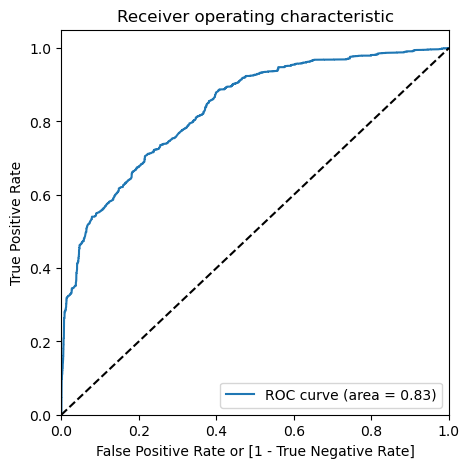

In [170]:
draw_roc(y_pred.default,y_pred.default_pred)

In [171]:
# An AUC of 0.83 proves that the model is good.

## Making predictions on the test set.

In [172]:
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,cluster_id,Invoice_Month
16556,0.292567,0,0,0,0,0,0,1,0,0,0,0,0,11
64689,0.069848,0,0,0,0,0,1,0,0,0,0,0,1,1
59541,6.094011,0,0,0,0,0,0,0,0,0,1,0,0,10
84747,0.342422,0,0,0,0,1,0,0,0,0,0,0,0,11
73797,-0.545928,0,0,1,0,0,0,0,0,0,0,0,0,3


In [173]:
# Adding a constant.
X_test_sm = sm.add_constant(X_test)

In [174]:
#Making predictions on the test set.

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

16556    0.797252
64689    0.243995
59541    0.986371
84747    0.778536
73797    0.749015
61366    0.971673
89540    0.986626
90966    0.657072
33768    0.970314
19577    0.981116
dtype: float64

In [175]:
# Converting y_pred to a dataframe for predicitons.
y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
# Converting y_test to dataframe.
y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting CustID to index.
y_test_df['CustID'] = y_test_df.index

In [178]:
y_test_df.head()

,DEFAULT,CustID
16556,0,16556
64689,0,64689
59541,1,59541
84747,1,84747
73797,1,73797


In [179]:
# Removing index for both dataframes to append them side by side. 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1.
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head()

,DEFAULT,CustID,0
0,0,16556,0.797252
1,0,64689,0.243995
2,1,59541,0.986371
3,1,84747,0.778536
4,1,73797,0.749015


In [182]:
# Renaming the column. 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Probability','Target':'Delay'})

In [183]:

y_pred_final.head()

,DEFAULT,CustID,Delay_Probability
0,0,16556,0.797252
1,0,64689,0.243995
2,1,59541,0.986371
3,1,84747,0.778536
4,1,73797,0.749015


In [184]:
# Creating final prediction on test set based on 0.6 cutoff.
y_pred_final['final_predicted'] = y_pred_final.Delay_Probability.map(lambda x: 1 if x >= 0.6 else 0)

In [185]:
y_pred_final.head()

,DEFAULT,CustID,Delay_Probability,final_predicted
0,0,16556,0.797252,1
1,0,64689,0.243995,0
2,1,59541,0.986371,1
3,1,84747,0.778536,1
4,1,73797,0.749015,1


In [186]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.DEFAULT, y_pred_final.final_predicted)

0.7728337236533958

In [187]:
#precision score
precision_score(y_pred_final.DEFAULT, y_pred_final.final_predicted)

0.815702649757707

In [188]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8492199039881831

In [189]:
# Train and test metrics are alsmost the same. Model is good to go. 

## Making a Random Forest model for predicitons on the Open Invoice set. 

In [190]:
# Importing libraries.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [191]:
new_df.drop(['DM'], axis = 1, inplace = True)

In [192]:
new_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

In [193]:
# creating X and y
X= new_df
y= merged_df['DEFAULT']

In [194]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
# Building a general random forest model to check the metrics.

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [196]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [197]:
# Checking accuracy and classification report.
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22427
           1       0.95      0.98      0.97     43328

    accuracy                           0.96     65755
   macro avg       0.96      0.95      0.95     65755
weighted avg       0.96      0.96      0.96     65755

Accuracy is :  0.9578435099992396


In [198]:
# Using cross validation to check if our model is overfitting or not.

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data.
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Computing the mean and standard deviation of the cross-validation scores.
mean_score = scores.mean()
std_score = scores.std()

# Printing the mean and standard deviation of the cross-validation scores.
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9528019231094478
Standard deviation: 0.0029268821096368994


In [199]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [200]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9532
           1       0.93      0.96      0.94     18650

    accuracy                           0.92     28182
   macro avg       0.92      0.91      0.91     28182
weighted avg       0.92      0.92      0.92     28182

Accuracy is :  0.9219005038677169


In [201]:
# Seems model is alright but lets tune some Hyper-parameters.

In [202]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best f1 score: 0.9391792422956016
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22427
           1       0.95      0.98      0.97     43328

    accuracy                           0.96     65755
   macro avg       0.96      0.95      0.95     65755
weighted avg       0.96      0.96      0.96     65755



In [203]:
# Test set.

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9532
           1       0.93      0.96      0.94     18650

    accuracy                           0.92     28182
   macro avg       0.92      0.91      0.91     28182
weighted avg       0.92      0.92      0.92     28182



In [204]:
# It can be seen clearly from the above classification report that the f1 scores for the train and test set are good hence this can be considered a good model.

## Open Invoice dataset prep.

In [205]:
# Selecting rows with negative age value for prediction as positive age means payment is already delayed and there is nothing to predict.
open_reg_df_age = open_data[open_data['AGE'] < 0]
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0


In [206]:
open_reg_df_age = pd.merge(open_reg_df_age, cust_segment1, how='left', on='Customer_Name')

In [207]:
# Null counts
round(open_reg_df_age.isna().sum()/len(open_reg_df_age.index), 2)

Customer_Name            0.00
Due Date                 0.00
AGE                      0.00
USD Amount               0.00
INV_CREATION_DATE        0.00
15 Days from EOM         0.00
30 Days from EOM         0.00
30 Days from Inv Date    0.00
45 Days from EOM         0.00
45 Days from Inv Date    0.00
60 Days from EOM         0.00
60 Days from Inv Date    0.00
90 Days from EOM         0.00
90 Days from Inv Date    0.00
Immediate Payment        0.00
INV                      0.00
CM                       0.00
cluster_id               0.03
dtype: float64

In [208]:
# Dropping the rows containing null values.
open_reg_df_age.dropna(axis=0, inplace=True)

In [209]:
open_reg_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  int32         
 6   30 Days from EOM       27247 non-null  int32         
 7   30 Days from Inv Date  27247 non-null  int32         
 8   45 Days from EOM       27247 non-null  int32         
 9   45 Days from Inv Date  27247 non-null  int32         
 10  60 Days from EOM       27247 non-null  int32         
 11  60 Days from Inv Date  27247 non-null  int32         
 12  90 Days from EOM       27247 non-null  int32         
 13  90 Day

In [210]:
# We can see that the cluster id column is in float format which needs to converted to interger.

In [211]:
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype('Int64')

In [212]:
# Checking the head after converting 'cluster_id' column
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,1,0,0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0,0


In [213]:
# Creating a copy of open_reg_df_age for final prediction
open_reg_df_final = open_reg_df_age.copy()

In [214]:
# Dropping Customer_Name and AGE column
open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [215]:
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month 

In [216]:
# dropping due_date and invoice creation date

open_reg_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [217]:
# dropping due_date and invoice creation date

open_reg_df_final.drop(['CM'], axis= 1, inplace= True)

## Final predictions based on the chosen Random Forest model.

In [218]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

array([0.4542511 , 0.89333333, 0.87455556, ..., 0.99333333, 0.91277931,
       0.86      ])

In [219]:
# Adding the predicted values to the dataframe
open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,1,0,0,0.454251
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.893333
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.874556
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.006667
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.973333


In [221]:
# Taking 0.6 as cut off value
open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [222]:
# Let us check our final dataframe with predictions
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,1,0,0,0.454251,0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.893333,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.874556,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.006667,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,1,0,0,0.973333,1


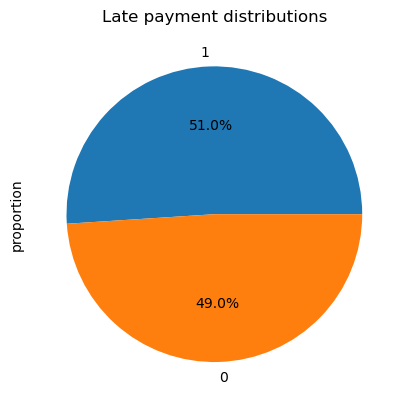

In [223]:
(open_reg_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

In [224]:
## From the Pie-Chart above we can see that 51% payments in the Open Invoice Data whose due dates will not cross as predicted by the model.
## Rest 49% are predicted to be the customers who will default and pay late.

## Summary of predictions based on Customers_name.

In [225]:
# Checking Customers with our target variable_delayed
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [226]:
# Checking Customers for total invoice counts
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count()
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [227]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [228]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [229]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [230]:
# Checking the Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,4378,8260,53.00
FITR Corp,1482,3454,42.91
PARF Corp,1062,1717,61.85
AREE Corp,717,1117,64.19
ALLI Corp,381,1042,36.56
...,...,...,...
ORJW Corp,1,1,100.00
LUBA Corp,1,1,100.00
NASM Corp,1,1,100.00


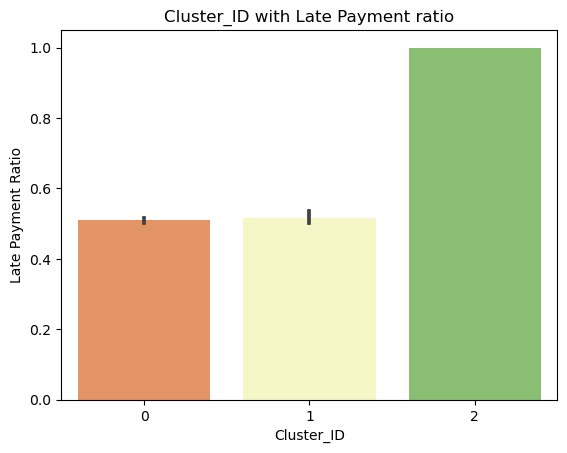

In [231]:
sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

## ClusterID 2  has severely higher chances of payment default, the organisation must focus the most on the customers in this cluster.

In [ ]:
# top 20 customers with highest delay rates

In [233]:
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(50)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SHIS Corp,8,8,100.0
ALSU Corp,7,7,100.0
SUND Corp,4,4,100.0
LVMH Corp,4,4,100.0
MANA Corp,3,3,100.0
THAR Corp,3,3,100.0
TRAF Corp,3,3,100.0
ROVE Corp,3,3,100.0
MAYC Corp,3,3,100.0


# Recommendations

. Second half of the year has low number of invoices but higher ratio of late payments and first half of the year has higher       number of invoices but lower late payment ratio.


. The mean and median invoice value for on time payments is more that that of late payments. Which means that smaller orders       show a tendency of delayed payments compared to larger orders.


. Late payment rate is the lowest for INV and highest for CM invoice classes.
. Goods sales have a higher late payment ratio than Non goods sales.


. Clustered the customers into three distinct cluster 0,1 and 2. 


. Cusotmers belonging in cluster 2 have the highest chances of delayed payments and should be handled with proper precautions. 
  Extensive focus must be paid to these customers to make them pay on time.
  
  
. Top 50 cutstomer names mentioned above have the highest chances of delayed payments as predicted by the models and should be taken into consideration.



## THE END